In [2]:
# Author: Eric Liu
# Date: 28 Feb 2025
# Description: The goal of this project is to identify the feature variables that increases the chances of developing Alzheimer
# Dataset Source: https://www.kaggle.com/datasets/ankushpanday1/alzheimers-prediction-dataset-global

# Dataset type: Tabular
# Number of rows: 74,283 rows
# Number of columns: 25 columns
# Target variable: (Yes/No) (Binary Classification)(Alzheimer’s Diagnosis)

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.neural_network import MLPClassifier

In [4]:
df = pd.read_csv('alzheimers_prediction_dataset.csv')
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,Normal,No,90,Low,Poor,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,Normal,No,65,Low,Good,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,Normal,No,43,High,Good,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,Normal,No,81,Medium,Average,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,Normal,No,49,High,Poor,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [5]:
df.shape

(74283, 25)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

### Pre-Processing

#### 1a. Check for Missing Values

In [6]:
print("Missing N/A Values:", df.isna().sum().sum())
print("Missing Null Values:", df.isnull().sum().sum())

Missing N/A Values: 0
Missing Null Values: 0


#### 1b. Check for Duplicated Values

In [7]:
print("Duplicated Values:", df.duplicated().sum())

Duplicated Values: 0


#### 2. Train/Test Split

In [8]:
X = df.drop('Alzheimer’s Diagnosis', axis=1)
y = df['Alzheimer’s Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

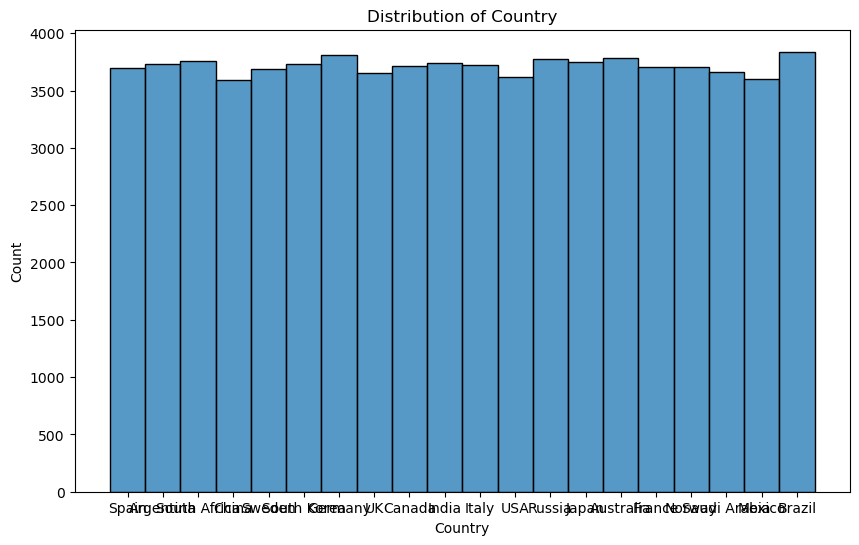

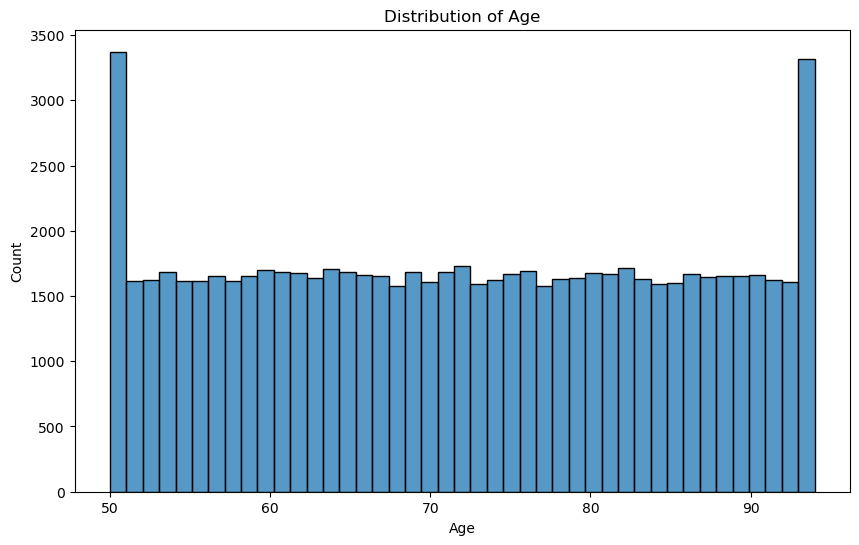

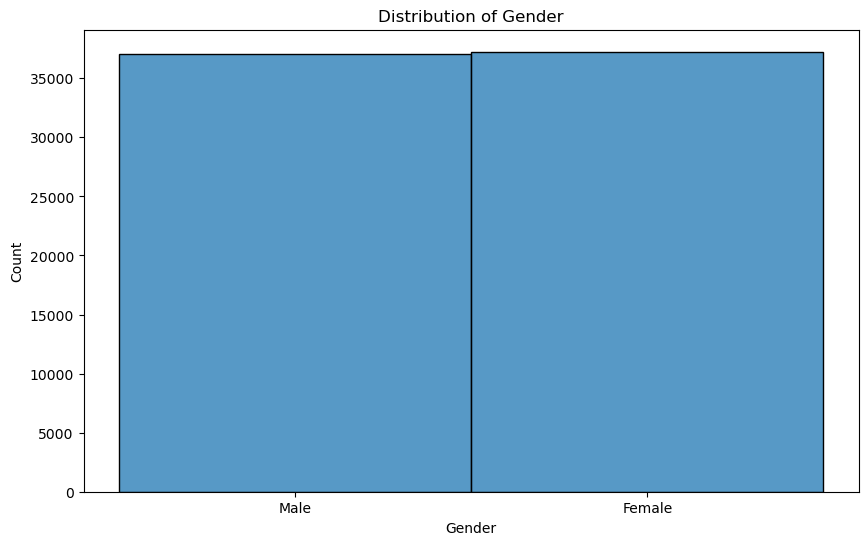

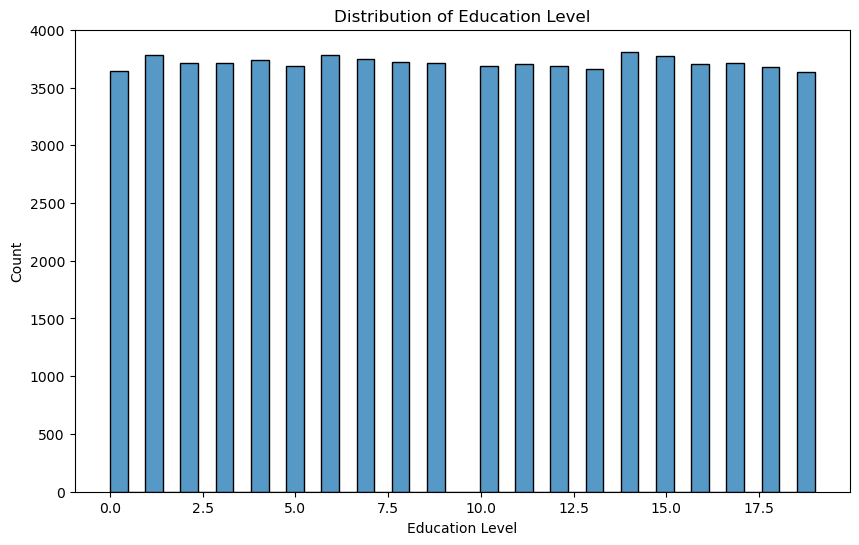

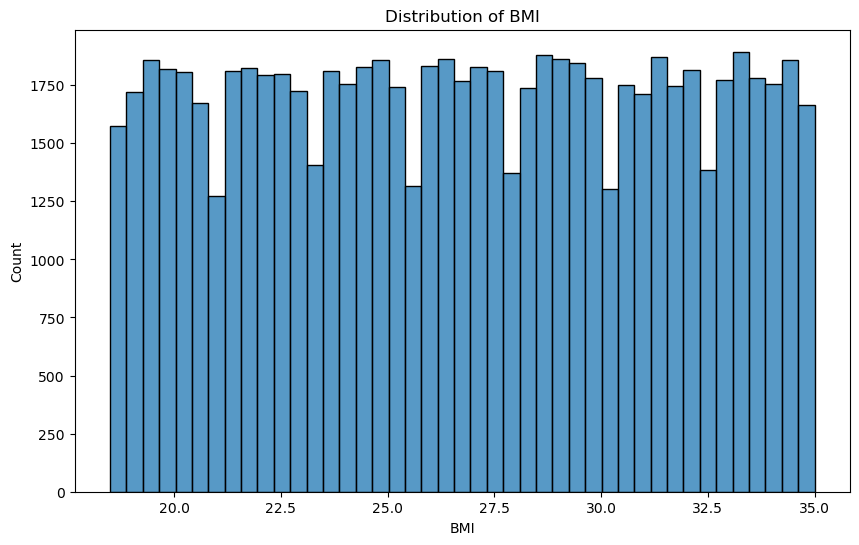

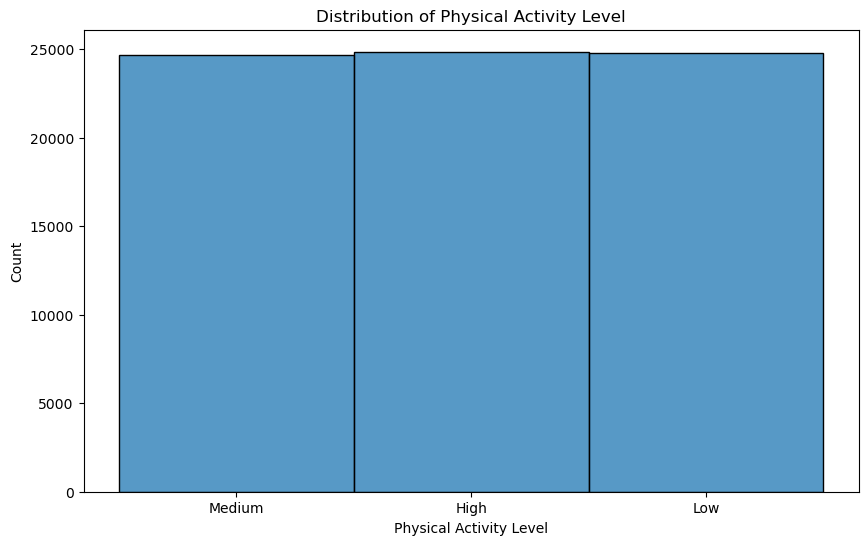

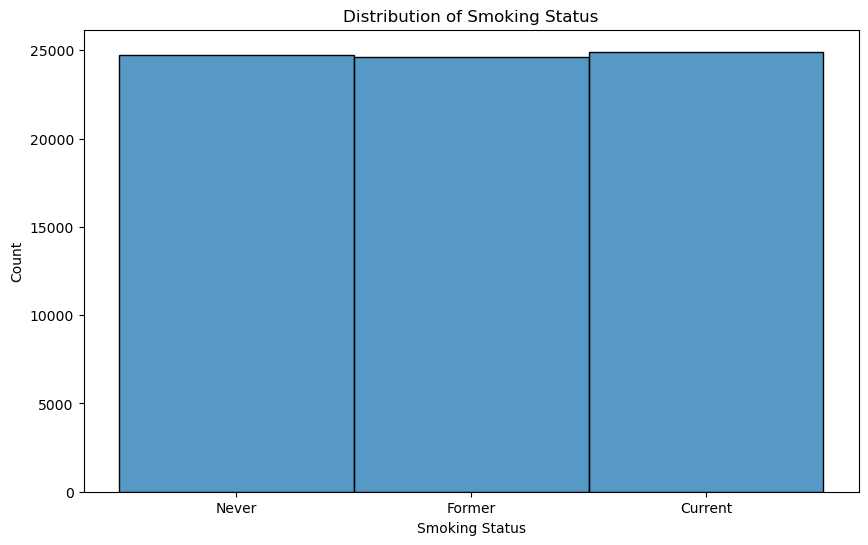

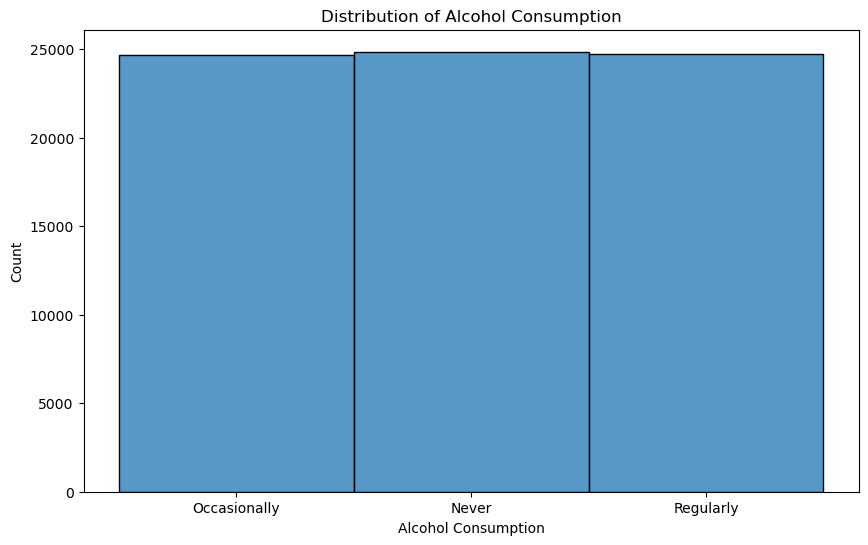

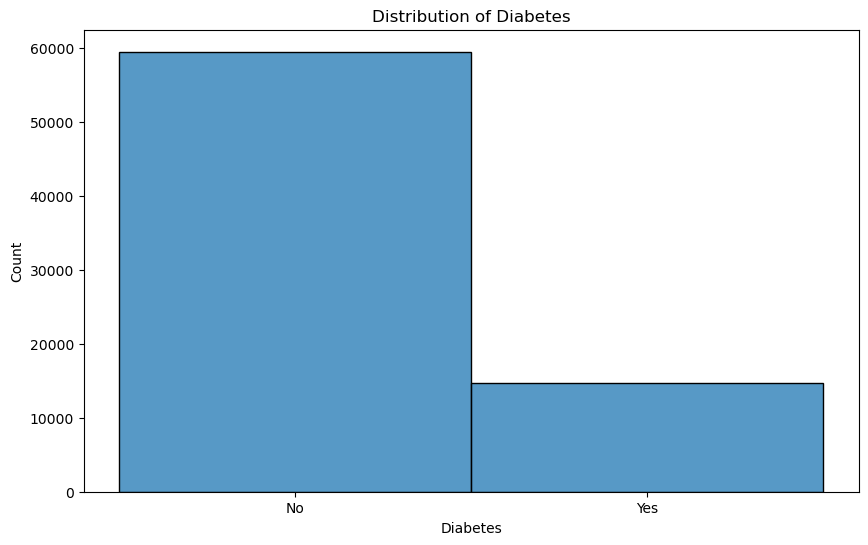

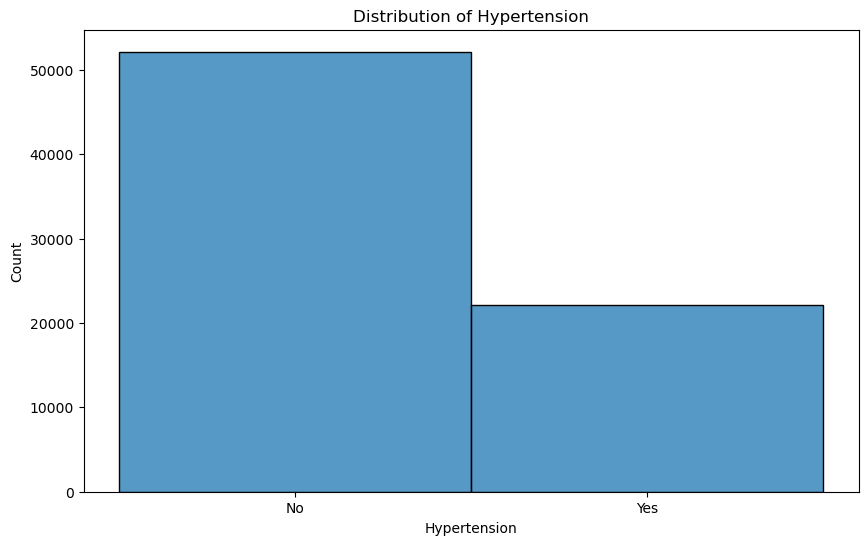

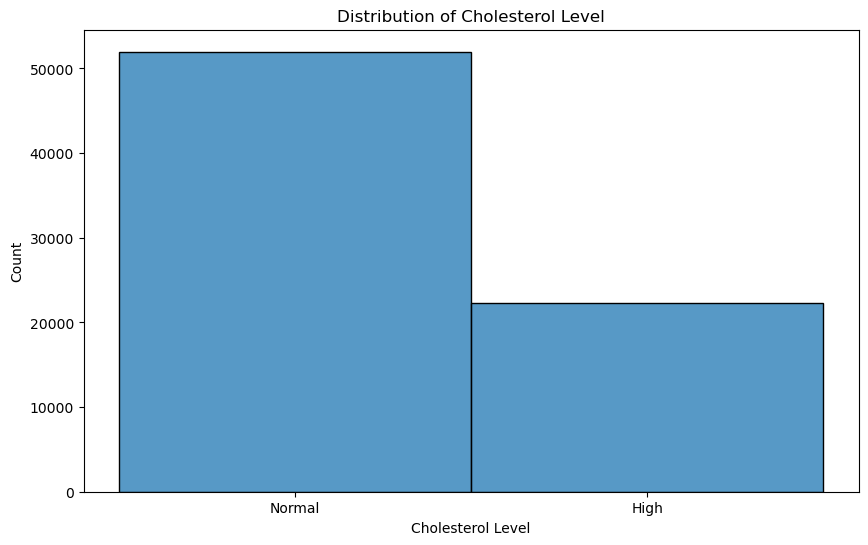

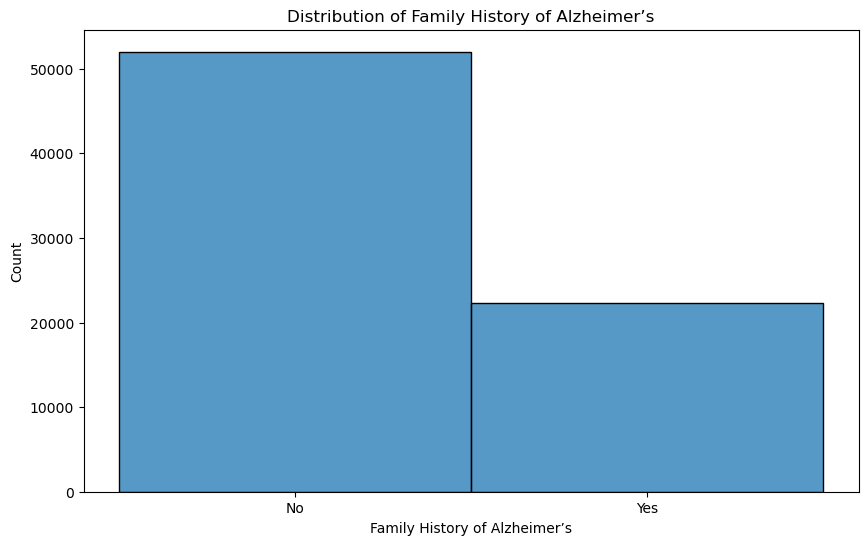

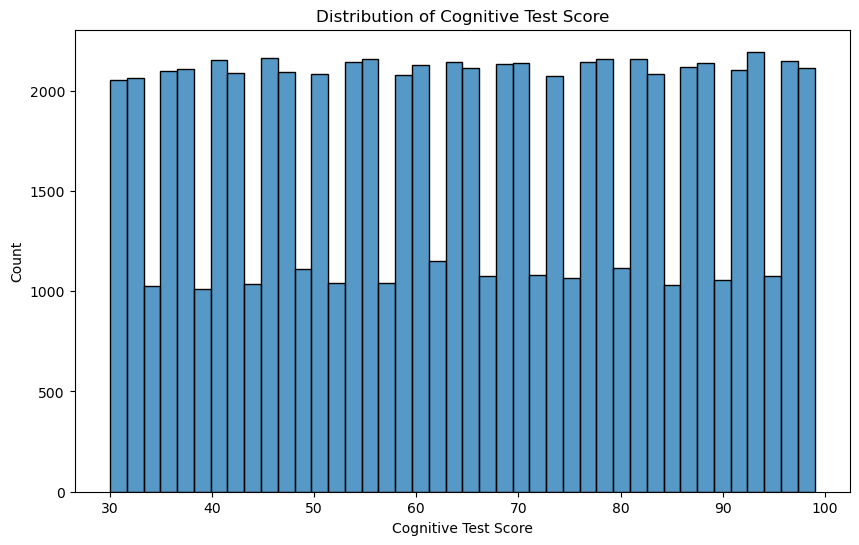

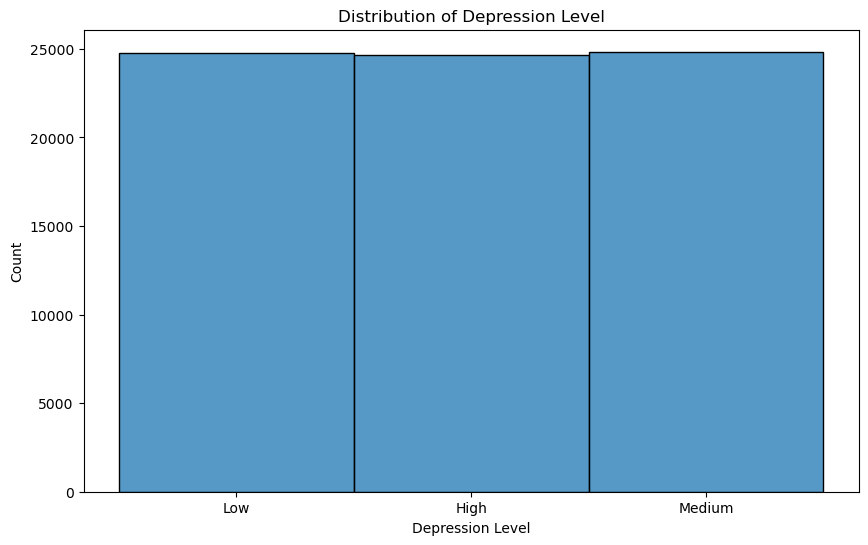

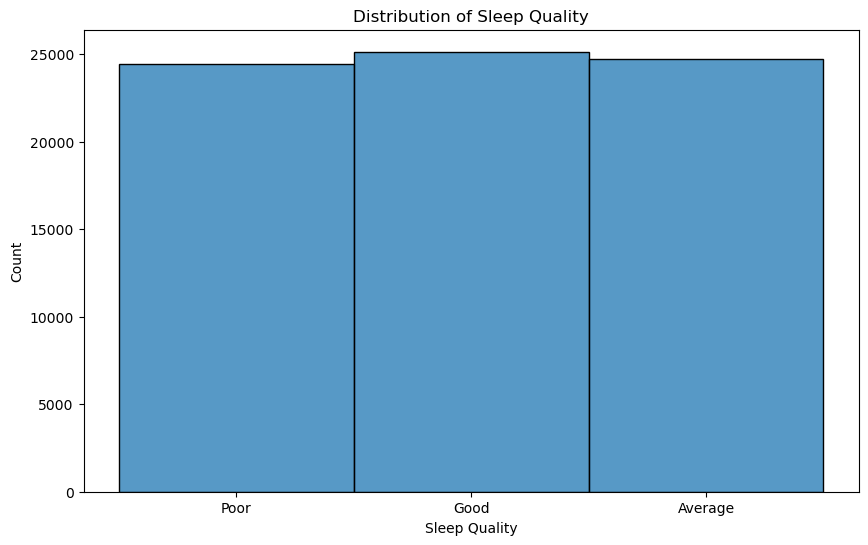

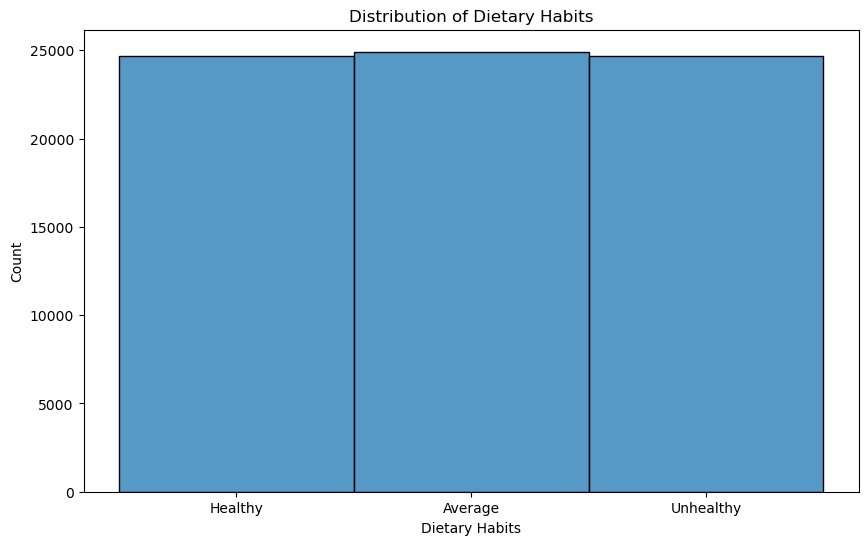

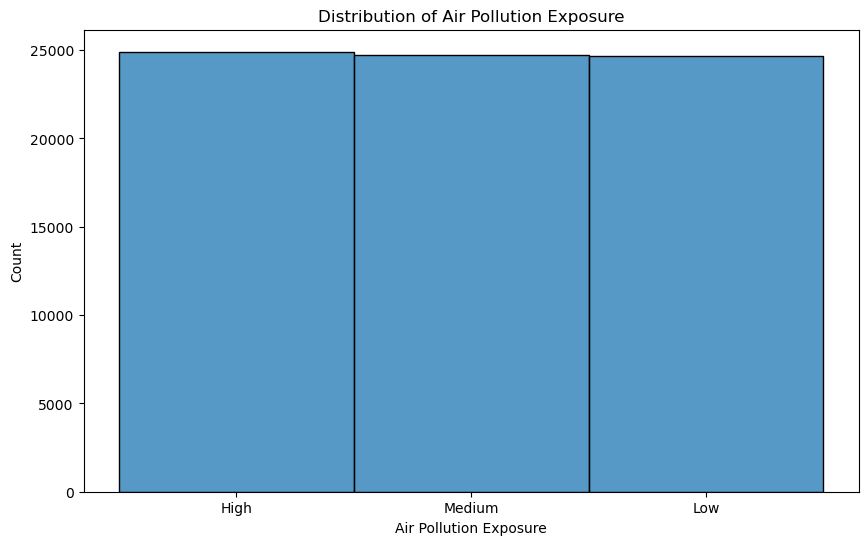

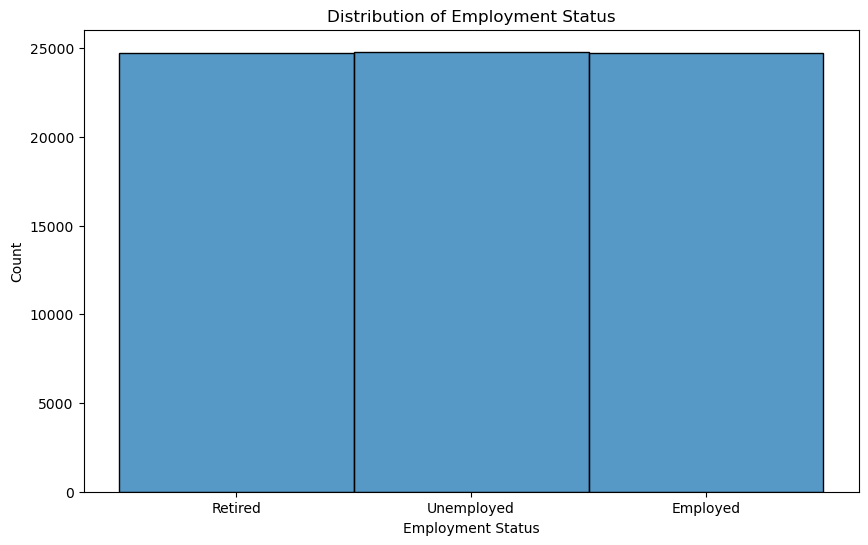

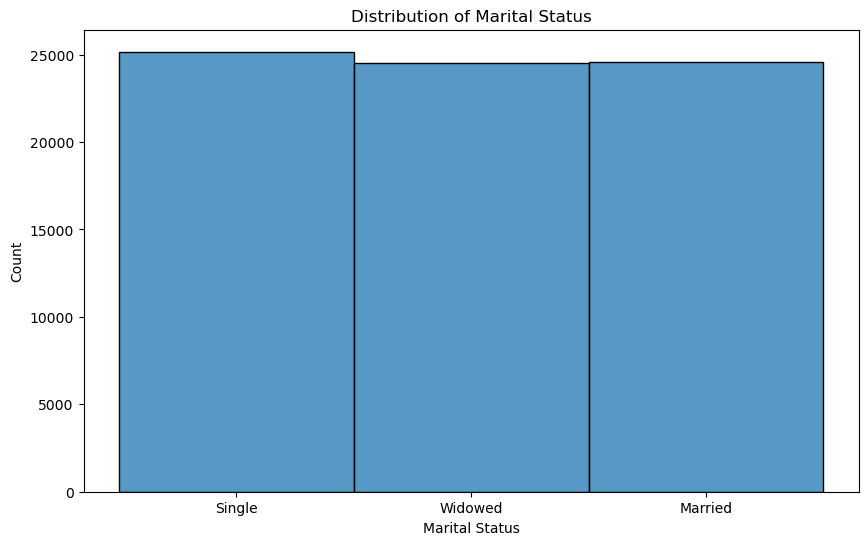

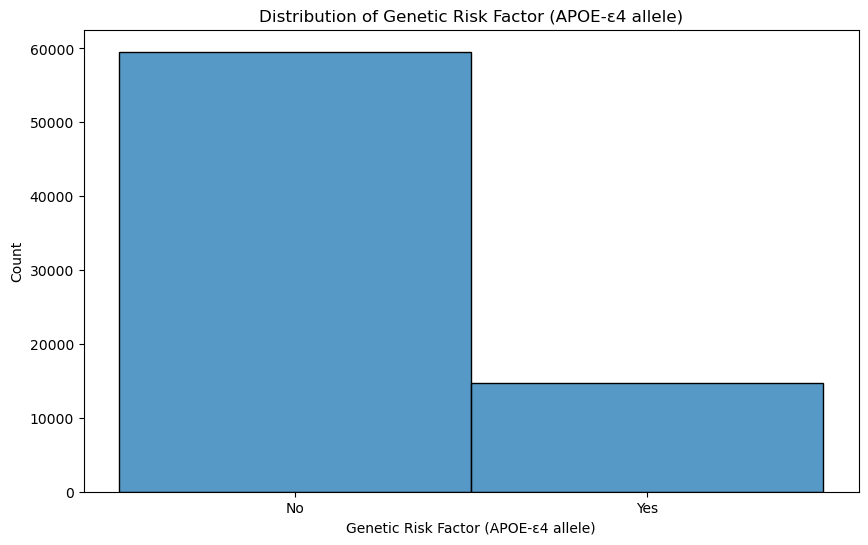

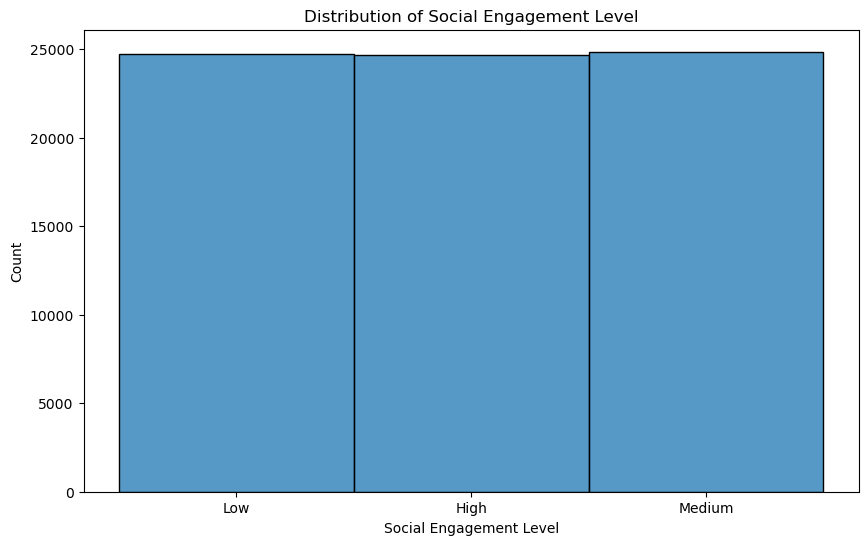

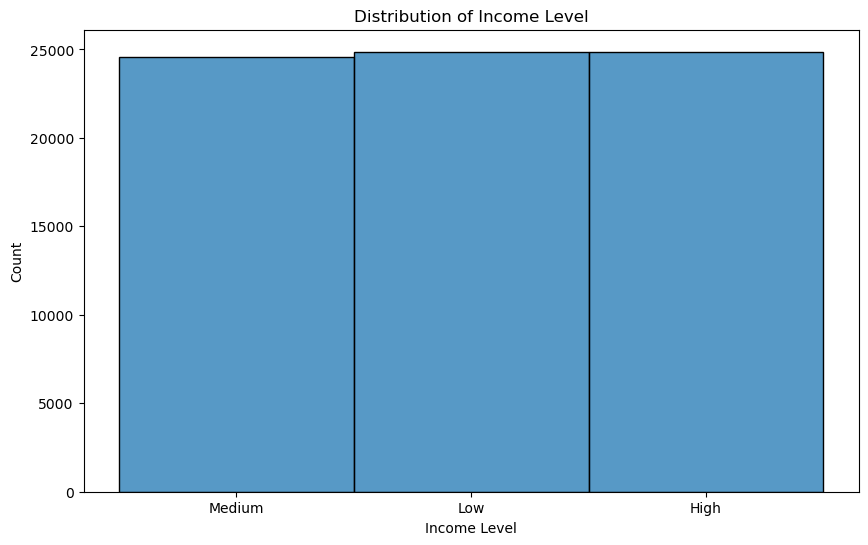

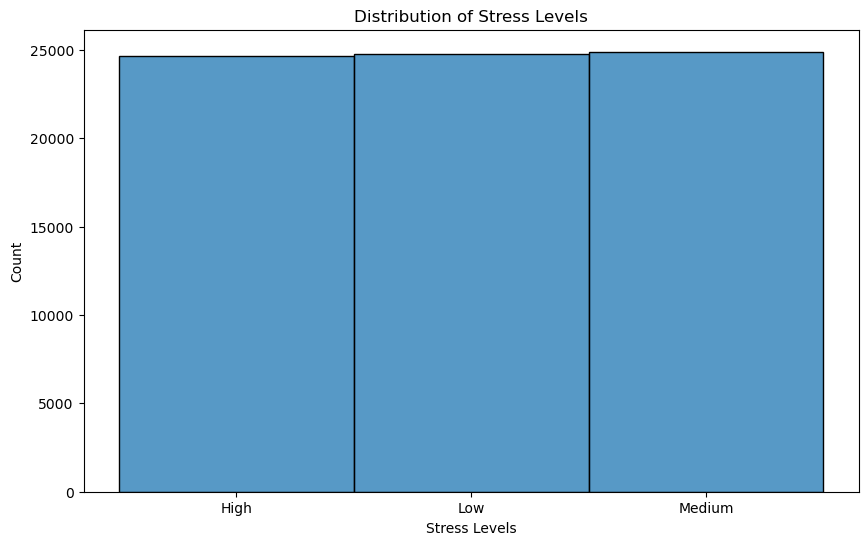

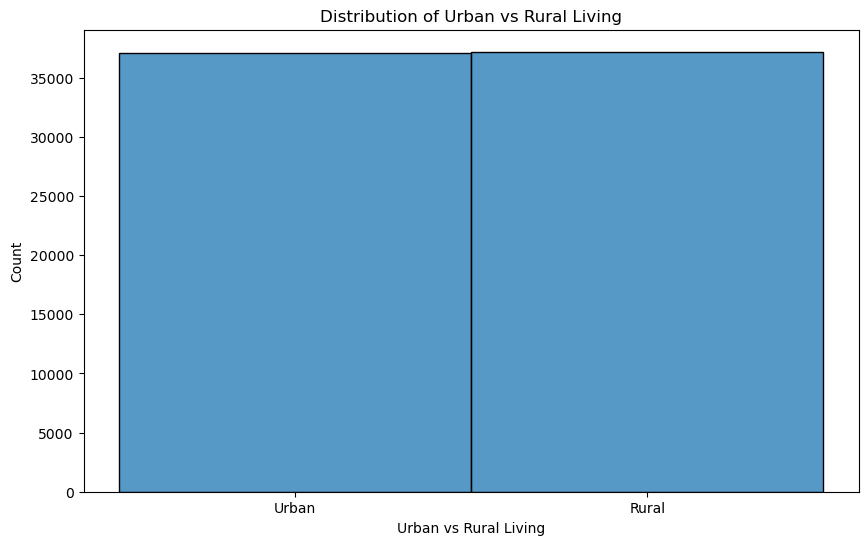

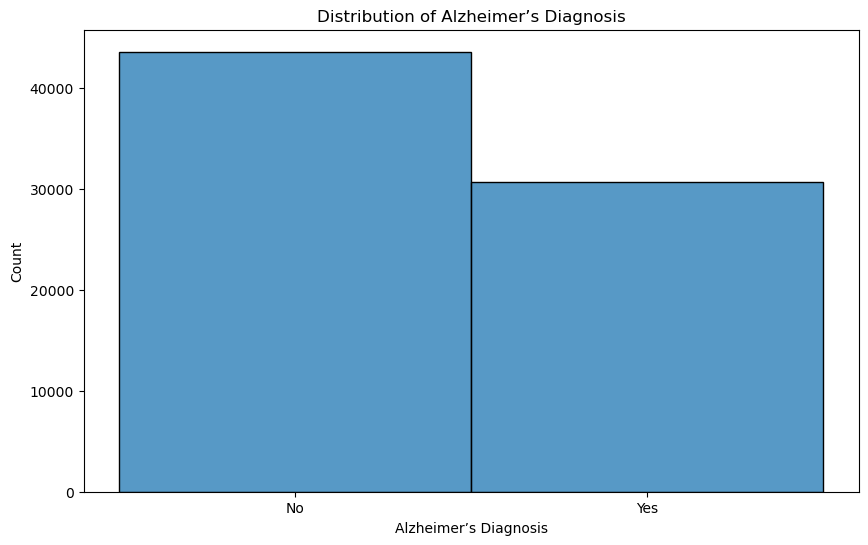

In [9]:
for feature in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()